# Math 228 - Project 3
Problem 1: We implement the code for the problem and plot the initial price $P_0$ as function of the initial value of the underlying $S(0)$ below: 

[ 0.02097683  0.73097091  1.54887507  2.36677923  3.1846834   4.00258756
  4.82049172  5.63839588  6.45630005  7.27420421  8.09210837  8.91001254
  9.7279167  10.54582086 11.36372502 12.18162919 12.99953335 13.81743751
 14.63534168 15.45324584]


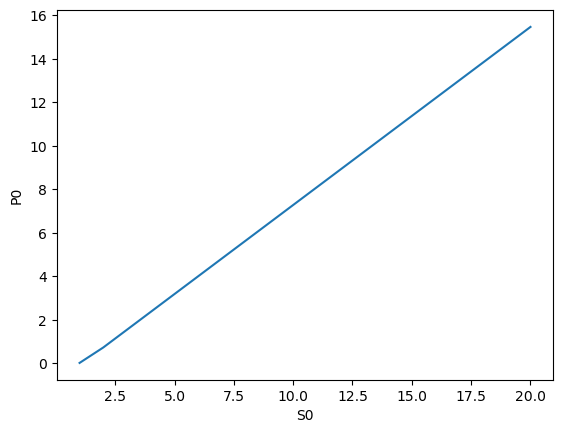

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

def european_call(r, u, d, S0, K, T, n, h):
    dt = T/n
    q = (math.exp(r*dt)-d)/(u -d)
    p0 = 0

    for i in range(n+1):
        s = S0*(u**(n-i))*(d**i)
        p0 = p0 + math.comb(n,i)*(q**i)*((1-q)**(n-i))*h(s, K)

    p0 = p0*math.exp(-r*T)
    return p0
def h(s,K):
    return np.max(np.array([s - K,0]))

r = 0.05
u = 1.05
d = 0.95
K = 1
T = 2
n = 10
N = 20
S0 = (np.arange(0,N)+1)
P0 = np.zeros((N,))
i=0
for s0 in S0:
    P0[i] = european_call(r, u, d, s0,K, T, n, h)
    i = i + 1
print(P0)

plt.figure()
plt.plot(S0,P0)
plt.xlabel("S0")
plt.ylabel("P0")
plt.show()

Problem 2: We will use the BTC-USD data for this problem. 

(1827, 1)


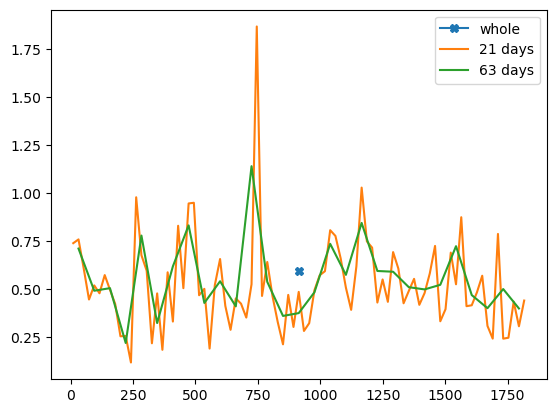

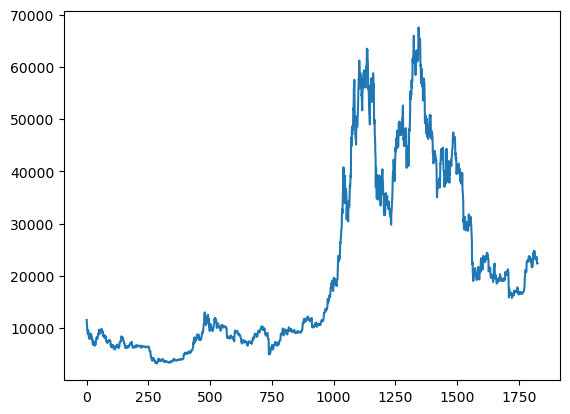

In [16]:
#Problem 2
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas import read_csv

def compute_volatility(data, time_size):
    n = data.size
    result = np.zeros((n//time_size,))
    time = np.zeros((n//time_size,))
    i = 0
    for item in np.split(data, n//time_size):
        result[i] = np.sum(np.power(np.log(item[1:]) - np.log(item[:-1]), 2))
        time[i] = (time_size*(i+1) + time_size*i)/2.0
        result[i] = np.sqrt((result[i]/(time_size))*252)
        i += 1



    return result , time

df = read_csv("BTC-USD.csv")
print(df.loc[:,["Adj Close"]].shape)
data = df.loc[:,["Adj Close"]].to_numpy().squeeze()
sigma_a, time_a = compute_volatility(data, data.size)
sigma_b, time_b = compute_volatility(data, 21)
sigma_c, time_c = compute_volatility(data, 63)

plt.figure()
plt.plot([0,data.size], [sigma_a,sigma_a], "-X", label="whole")
plt.plot(time_b, sigma_b, "-", label="21 days")
plt.plot(time_c, sigma_c, "-", label="63 days")
plt.legend()
plt.show()

plt.figure()
plt.plot(np.arange(data.size),data)
plt.show()




0.5
0.5000938380526422


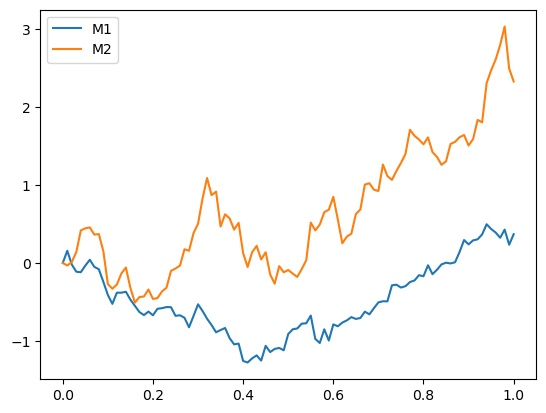

In [16]:
#Problem 3
import numpy as np
import math
import matplotlib.pyplot as plt
def coupled_gain_process(xi, G, n, T):
    dt = T/n

    Bt = np.random.randn(2,n)*math.sqrt(dt)

    sol = np.zeros((2,n+1))
    for i in range(n):
        sol[:,i+1] = (sol[:,i].reshape(-1,1) + np.multiply(xi,np.matmul(G,Bt[:,i]).reshape(-1,1))).reshape(-1)

    return sol

def coupled_gain_process_end(xi, G, n, T, num_trials):
    dt = T/n

    sol = np.zeros((2,num_trials))
    for i in range(n):
        Bt = np.random.randn(2,num_trials)*math.sqrt(dt)
        sol = sol + np.multiply(xi,np.matmul(G,Bt))

    return sol


n = 100
T = 1
t = np.linspace(0,1,num=n+1)
rho = 0.5
xi = np.array([[1],[2]])
G = np.array([[1,0],[rho,np.sqrt(1-rho**2)]])

#Part b

sol = coupled_gain_process(xi, G, n, T)

plt.figure()
plt.plot(t,sol[0,:])
plt.plot(t, sol[1,:])
plt.legend(["M1","M2"])

#Part c
num_trials = 50000
sol = coupled_gain_process_end(xi, G, n, T, num_trials)

numer_theo = xi[0,0]*xi[1,0]*rho*T
denom_theo = np.sqrt((T*xi[0,0]**2)*(T*xi[1,0]**2))
cor_coef_theo = numer_theo/denom_theo

numer_exp = np.mean(np.multiply(sol[0,:], sol[1,:]),axis=0)
denom_exp = np.sqrt(np.mean(np.power(sol[0,:],2))*np.mean(np.power(sol[1,:],2)))
cor_coef_exp = numer_exp/denom_exp 

print(cor_coef_theo)
print(cor_coef_exp)




In [10]:
a = np.random.randint(0,10,(2,2))
b = np.random.randint(0,10,(2,1))
print(a)
print(b)
print(np.multiply(b,a))

[[4 3]
 [7 5]]
[[5]
 [5]]
[[20 15]
 [35 25]]
